<a href="https://colab.research.google.com/github/maza123716/Machine-Learning/blob/main/Message_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description.**

*  This program/project will be able to determine whether or not a message is spam.
*   Ham, which stands for "not spam," can be attached to the messages.
*   This is a classification issue, and a binary classification issue at that.



**Importing important libraries**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import pickle
import tensorflow as tf

# For text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# For model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# split data into train and test set
from sklearn.model_selection import train_test_split

**Load the Dataset**

In [51]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [52]:
data = pd.read_csv("spam.csv", encoding ='latin-1')
data.sample()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1052,ham,I got another job! The one at the hospital doi...,NaN,NaN,NaN


**Prepare the Dataset**

In [53]:
# Drop the columns labeled Unnamed
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [54]:
# Rename the columns v1 and v2
data = data.rename(columns={"v1":"label", "v2":"text"})
data.sample()

,label,text
966,ham,I am not sure about night menu. . . I know onl...


In [55]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Mapping Spam to 1 and Ham to 0 will make it easier during training of the model

In [56]:
data['label'] = data['label'].map( {'spam': 1, 'ham': 0} )

**Tokenization and Embedding**

In [57]:
# Specifying the X and y values to be used for training
X = data['text'].values
y = data['label'].values

In [58]:
# Split the data into train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)

In [60]:
# Integer encode the documents
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)


In [61]:
# Padding - Ensuring the input data is in the same shape and length
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

**Training the model**

In [62]:
vocab_size = len(t.word_index) + 1

In [63]:
# Defining the model

model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 8, 24)             190920    
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               96500     
                                                                 
 dense_5 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 1)                

In [66]:
# Apply ealry stopping- the model trains for a numbe rof epochs and stops if the model is not improving anymore.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 10)


In [67]:
# Fitting the model
model.fit(x=padded_train,y=y_train,epochs=50,validation_data=(padded_test, y_test), verbose=1,callbacks=[early_stop])

Epoch 1/50
140/140 [==============================] - 2s 10ms/step - loss: 0.1947 - accuracy: 0.9199 - val_loss: 0.1236 - val_accuracy: 0.9776
Epoch 2/50
140/140 [==============================] - 1s 9ms/step - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.0874 - val_accuracy: 0.9812
Epoch 3/50
140/140 [==============================] - 1s 9ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.1131 - val_accuracy: 0.9812
Epoch 4/50
140/140 [==============================] - 1s 8ms/step - loss: 6.1861e-04 - accuracy: 0.9996 - val_loss: 0.2336 - val_accuracy: 0.9821
Epoch 5/50
140/140 [==============================] - 1s 7ms/step - loss: 5.0905e-04 - accuracy: 0.9998 - val_loss: 0.2530 - val_accuracy: 0.9803
Epoch 6/50
140/140 [==============================] - 1s 7ms/step - loss: 3.7305e-07 - accuracy: 1.0000 - val_loss: 0.2887 - val_accuracy: 0.9830
Epoch 7/50
140/140 [==============================] - 1s 7ms/step - loss: 1.5414e-08 - accuracy: 1.0000 - val_loss: 0.3137 - val_accura

**Evaluating the Permance metrics**

In [68]:
# Building a classification report and a confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [69]:
# Making a prediction 
preds = (model.predict(padded_test) > 0.5).astype("int32")

In [70]:
# Classification report
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy : 0.9829596412556054


0.9829596412556054

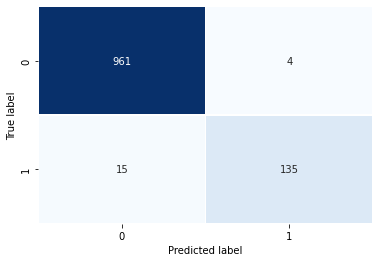

In [71]:
# Confusion matrix
plot_confusion_matrix(y_test, preds)

*   From the confuson matrix and the classification report we can conclude that the model is genreally performing well since it has high precision, recall , f1-score and accuracy values.
*   The confusion matrix also shows how well the model is performing since it has 961 True positives out of 965 and 135 true negatives out of 150.
*   These metrics however may vary every time the program is run.






In [72]:
# Saving the trained model
model.save("spam_model")

INFO:tensorflow:Assets written to: spam_model/assets


INFO:tensorflow:Assets written to: spam_model/assets
